Importing all the required Libraries.

In [1]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression,Lasso,Ridge


from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split


from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    classification_report,
    auc
)

from sklearn.calibration import calibration_curve
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import clone   # <-- add this line


import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)


pd.set_option('display.max_columns', 50)
plt.style.use('seaborn-v0_8-darkgrid')

## 2. Load Data

In [2]:
#2
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
variable_list = pd.read_csv('/content/VariableList.csv')

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"\nTarget variables:")
print(f"  - target_reg_foodinsec2123 (Food Insecurity 2021-2023)")
print(f"  - target_reg_diabetes19 (Diabetes 2019)")
print(f"  - label_cls_obesity_hotspot (Obesity Hotspot)")

train_df.head()




Training set shape: (2514, 304)
Test set shape: (623, 301)

Target variables:
  - target_reg_foodinsec2123 (Food Insecurity 2021-2023)
  - target_reg_diabetes19 (Diabetes 2019)
  - label_cls_obesity_hotspot (Obesity Hotspot)


,FIPS,State,County,LACCESS_POP15,LACCESS_POP19,PCH_LACCESS_POP_15_19,PCT_LACCESS_POP15,PCT_LACCESS_POP19,LACCESS_LOWI15,LACCESS_LOWI19,PCH_LACCESS_LOWI_15_19,PCT_LACCESS_LOWI15,PCT_LACCESS_LOWI19,LACCESS_HHNV15,LACCESS_HHNV19,PCH_LACCESS_HHNV_15_19,PCT_LACCESS_HHNV15,PCT_LACCESS_HHNV19,LACCESS_SNAP15,LACCESS_SNAP19,PCH_LACCESS_SNAP_15_19,PCT_LACCESS_SNAP15,PCT_LACCESS_SNAP19,LACCESS_CHILD15,LACCESS_CHILD19,...,PCH_RECFAC_16_20,RECFACPTH16,RECFACPTH20,PCH_RECFACPTH_16_20,PCT_NHWHITE20,PCT_NHBLACK20,PCT_HISP20,PCT_NHASIAN20,PCT_NHNA20,PCT_NHPI20,PCT_NHOR20,PCT_NHTMR20,PCT_65OLDER20,PCT_18YOUNGER20,MEDHHINC21,POVRATE21,DEEPPOVRATE21,PERPOV17_21,CHILDPOVRATE21,DEEPCHILDPOVRATE21,METRO23,POPLOSS15,target_reg_foodinsec2123,target_reg_diabetes19,label_cls_obesity_hotspot
0,28021,MS,Claiborne,928.310036,1236.956624,33.248222,9.665869,12.879599,693.575612,878.649833,26.684072,7.221737,9.148790,306.883562,257.919191,-15.955358,8.921034,7.497651,604.350030,633.138273,4.763505,17.568316,18.405182,1754.627444,1655.254798,...,-9999.0,0.109016,-9999.000000,-9999.000000,10.662288,87.126437,0.788177,0.000000,0.087575,0.000000,0.087575,1.247947,15.621237,20.930487,33163,33.3,18.155410,1,39.9,32.981530,0,0,16.2,10.7,1
1,19059,IA,Dickinson,594.606722,1399.225343,135.319458,3.567569,8.395185,108.843320,314.009871,188.497147,0.653047,1.884022,101.327235,164.639971,62.483433,1.341372,2.179507,218.915544,257.084260,17.435362,2.898008,3.403286,1550.415180,1601.969659,...,75.0,0.233440,0.398883,70.871564,94.385132,0.429306,2.293397,0.451901,0.079083,0.005649,0.141219,2.214314,27.549003,19.041970,67949,7.5,1.499164,0,8.7,1.330180,0,0,9.8,9.1,0
2,39135,OH,Preble,5753.949344,5713.362105,-0.705381,13.612371,13.516353,1284.010932,1260.523910,-1.829192,3.037641,2.982077,376.791886,405.412486,7.595864,2.305807,2.480953,1506.742888,1052.143691,-30.170986,9.220629,6.438674,7808.815240,7799.958402,...,-9999.0,0.024303,-9999.000000,-9999.000000,94.392546,0.443913,0.941486,0.395132,0.204883,0.009756,0.239030,3.373253,20.520013,22.571282,56134,11.0,4.002660,0,15.3,4.161148,0,0,12.8,8.7,1
3,51740,VA,Portsmouth,17647.181820,22066.971610,25.045301,18.471954,23.098310,4008.240024,5632.505125,40.523151,4.195572,5.895751,387.084000,618.006236,59.656879,1.037091,1.655788,757.020369,1018.817078,34.582520,2.028240,2.729657,3910.013046,5030.985025,...,-9999.0,0.073462,-9999.000000,-9999.000000,35.655415,52.684471,4.506970,1.270490,0.362559,0.136853,0.500434,4.882807,15.825972,22.214165,53618,17.6,9.448440,0,25.8,15.129218,1,0,10.0,12.9,0
4,20023,KS,Cheyenne,260.513953,871.671465,234.596847,9.556638,31.976210,71.257627,226.587208,217.983093,2.614000,8.312077,1.036156,12.486340,1105.063354,0.082235,0.990979,21.075377,9.836201,-53.328468,1.672649,0.780651,207.584717,315.910496,...,-9999.0,-9999.000000,-9999.000000,-9999.000000,84.977064,0.229358,9.097859,0.458716,0.267584,0.000000,0.152905,4.816514,26.643731,22.018349,49281,13.8,9.996155,0,20.8,15.454545,0,1,10.6,7.4,0


In [3]:
#8
def extract_year_from_feature(feature_name):

    import re

    match = re.search(r'(\d{2})$', feature_name)
    if match:
        year_suffix = int(match.group(1))
        if year_suffix <= 25:
            return 2000 + year_suffix
        else:
            return 1900 + year_suffix
    return None

def get_features_by_year(df, max_year):
    features = []
    for col in df.columns:

        if col in ['FIPS', 'State', 'County', 'target_reg_foodinsec2123',
                   'target_reg_diabetes19', 'label_cls_obesity_hotspot']:
            continue

        year = extract_year_from_feature(col)
        if year is None or year <= max_year:
            features.append(col)

    return features


features_foodinsec = get_features_by_year(train_df, 2021)
features_diabetes = get_features_by_year(train_df, 2019)
features_obesity = get_features_by_year(train_df, 2022)

print(f"Features for Food Insecurity (≤2021): {len(features_foodinsec)}")
print(f"Features for Diabetes (≤2019): {len(features_diabetes)}")
print(f"Features for Obesity (≤2022): {len(features_obesity)}")

Features for Food Insecurity (≤2021): 276
Features for Diabetes (≤2019): 207
Features for Obesity (≤2022): 288


In [4]:
#3
variable_list.columns = variable_list.columns.str.lower()

display(variable_list.head())
feature_to_category = variable_list.set_index('variable_code')['category_code'].to_dict()

def summarize_feature_categories(feature_list, title):
    cats = pd.Series(
        [feature_to_category.get(f, 'UNKNOWN') for f in feature_list],
        index=feature_list,
        name='Category'
    )
    cat_counts = cats.value_counts().rename_axis('Category').reset_index(name='Count')
    cat_counts['Percent'] = 100 * cat_counts['Count'] / cat_counts['Count'].sum()
    print(f"\n=== Feature Category Breakdown: {title} ===")
    display(cat_counts)



summarize_feature_categories(features_foodinsec, "Food Insecurity (reg_foodinsec2123)")
summarize_feature_categories(features_diabetes, "Diabetes (reg_diabetes19)")
summarize_feature_categories(features_obesity, "Obesity Hotspot (cls_obesity_hotspot)")


,variable_name,category_name,category_code,subcategory_name,variable_code,units
0,"Population, low access to store, 2015",Access and Proximity to Foodstore,ACCESS,Overall,LACCESS_POP15,Count
1,"Population, low access to store, 2019",Access and Proximity to Foodstore,ACCESS,Overall,LACCESS_POP19,Count
2,"Population, low access to store (% change), 20...",Access and Proximity to Foodstore,ACCESS,Overall,PCH_LACCESS_POP_15_19,% change
3,"Population, low access to store (%), 2015",Access and Proximity to Foodstore,ACCESS,Overall,PCT_LACCESS_POP15,Percent
4,"Population, low access to store (%), 2019",Access and Proximity to Foodstore,ACCESS,Overall,PCT_LACCESS_POP19,Percent



=== Feature Category Breakdown: Food Insecurity (reg_foodinsec2123) ===


,Category,Count,Percent
0,LOCAL,92,33.333333
1,ACCESS,65,23.550725
2,ASSISTANCE,44,15.942029
3,STORES,30,10.869565
4,SOCIOECONOMIC,17,6.159420
5,RESTAURANTS,12,4.347826
6,HEALTH,9,3.260870
7,PRICES_TAXES,5,1.811594
8,INSECURITY,2,0.724638



=== Feature Category Breakdown: Diabetes (reg_diabetes19) ===


,Category,Count,Percent
0,LOCAL,92,44.444444
1,ACCESS,65,31.400966
2,ASSISTANCE,24,11.594203
3,STORES,12,5.797101
4,PRICES_TAXES,5,2.415459
5,RESTAURANTS,4,1.932367
6,HEALTH,4,1.932367
7,SOCIOECONOMIC,1,0.483092



=== Feature Category Breakdown: Obesity Hotspot (cls_obesity_hotspot) ===


,Category,Count,Percent
0,LOCAL,92,31.944444
1,ACCESS,65,22.569444
2,ASSISTANCE,52,18.055556
3,STORES,34,11.805556
4,SOCIOECONOMIC,17,5.902778
5,RESTAURANTS,12,4.166667
6,HEALTH,9,3.125000
7,PRICES_TAXES,5,1.736111
8,INSECURITY,2,0.694444


## 3. Exploratory Data Analysis (EDA)

In [5]:
#4

eda_df = train_df.copy()
sentinel_values = [-9999, -8888]
eda_df = eda_df.replace(sentinel_values, np.nan)

numeric_cols = eda_df.select_dtypes(include=[np.number]).columns.tolist()

# Feature summary table (type, missingness, basic stats) for key model features
summary_cols = list(set(features_foodinsec + features_diabetes + features_obesity))
summary_cols = [c for c in summary_cols if c in numeric_cols]

summary_df = pd.DataFrame({
    'dtype': eda_df[summary_cols].dtypes,
    'missing_pct': eda_df[summary_cols].isna().mean() * 100,
    'mean': eda_df[summary_cols].mean(),
    'std': eda_df[summary_cols].std(),
    'min': eda_df[summary_cols].min(),
    'median': eda_df[summary_cols].median(),
    'max': eda_df[summary_cols].max()
}).sort_values('missing_pct', ascending=False)

print("=== Feature Summary Table (combined modeling feature set) ===")
display(summary_df.head(20))  # show top 20 by missingness; adjust as needed


=== Feature Summary Table (combined modeling feature set) ===


,dtype,missing_pct,mean,std,min,median,max
PCH_SUPERC_16_20,float64,78.838504,71.262935,126.600091,-42.857143,40.000000,1750.000000
PCH_SUPERCPTH_16_20,float64,78.838504,68.151495,128.036291,-41.166911,36.280557,1773.469422
SUPERC20,float64,78.719173,10.112150,13.414403,3.000000,6.000000,160.000000
SUPERCPTH20,float64,78.719173,0.031657,0.015105,0.005391,0.029243,0.180072
PCH_SPECSPTH_16_20,float64,65.234686,8.547590,51.233347,-67.379074,-3.096006,310.292385
PCH_SPECS_16_20,float64,65.234686,10.563042,51.698195,-62.500000,0.000000,300.000000
SPECSPTH20,float64,64.956245,0.087473,0.067528,0.015244,0.068734,0.635324
SPECS20,float64,64.956245,19.828604,48.787539,3.000000,6.000000,779.000000
PCH_RECFACPTH_16_20,float64,59.188544,21.985442,53.347852,-63.726385,11.116176,443.818573
PCH_RECFAC_16_20,float64,59.188544,24.379511,54.631467,-63.157895,14.285714,500.000000


Sentinel values must be converted to NaN so they appear in missingness statistics and can be handled by imputation. Dropping extreme-missing features prevents noise and overfitting, while imputation fills gaps to maintain modeling compatibility.

Features with >40% missing values: 25
Total features: 304



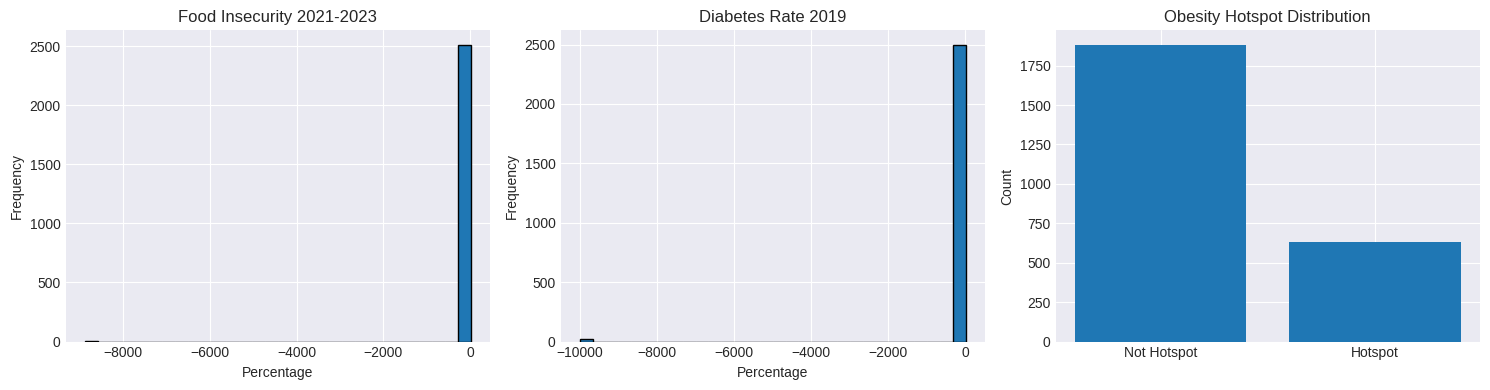


=== Target Variable Statistics (cleaned data) ===

Food Insecurity:
count    2508.000000
mean       12.436045
std         2.476651
min         7.400000
25%        10.600000
50%        12.300000
75%        13.000000
max        18.900000
Name: target_reg_foodinsec2123, dtype: float64

Diabetes:
count    2495.000000
mean        8.733988
std         1.623627
min         4.100000
25%         7.500000
50%         8.400000
75%         9.600000
max        17.600000
Name: target_reg_diabetes19, dtype: float64

Obesity Hotspot:
label_cls_obesity_hotspot
0    1880
1     634
Name: count, dtype: int64


In [6]:
#5
sentinel_counts = (train_df == -9999).sum() + (train_df == -8888).sum()
sentinel_pct = sentinel_counts / len(train_df) * 100

print(f"Features with >40% missing values: {(sentinel_pct > 40).sum()}")
print(f"Total features: {len(train_df.columns)}\n")


fig, axes = plt.subplots(1, 3, figsize=(15, 4))


axes[0].hist(train_df['target_reg_foodinsec2123'].dropna(), bins=30, edgecolor='black')
axes[0].set_title('Food Insecurity 2021-2023')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Frequency')


axes[1].hist(train_df['target_reg_diabetes19'].dropna(), bins=30, edgecolor='black')
axes[1].set_title('Diabetes Rate 2019')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Frequency')


obesity_counts = train_df['label_cls_obesity_hotspot'].value_counts()
axes[2].bar(['Not Hotspot', 'Hotspot'], [obesity_counts.get(0, 0), obesity_counts.get(1, 0)])
axes[2].set_title('Obesity Hotspot Distribution')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\n=== Target Variable Statistics (cleaned data) ===")
print(f"\nFood Insecurity:")
print(eda_df['target_reg_foodinsec2123'].dropna().describe())
print(f"\nDiabetes:")
print(eda_df['target_reg_diabetes19'].dropna().describe())
print(f"\nObesity Hotspot:")
print(eda_df['label_cls_obesity_hotspot'].value_counts())

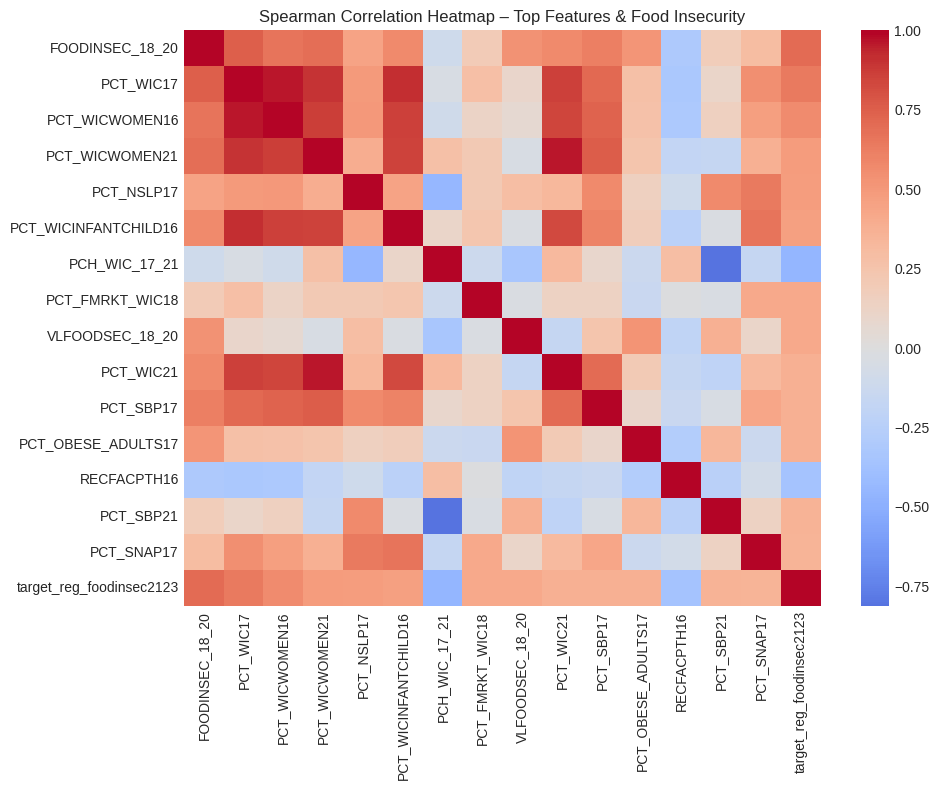

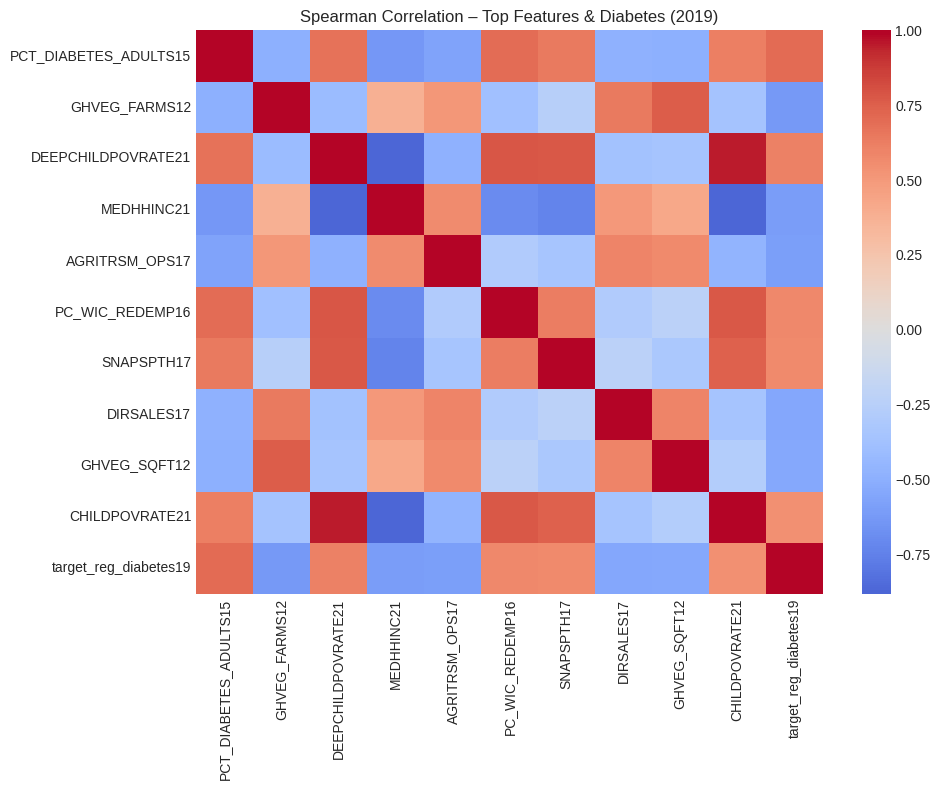

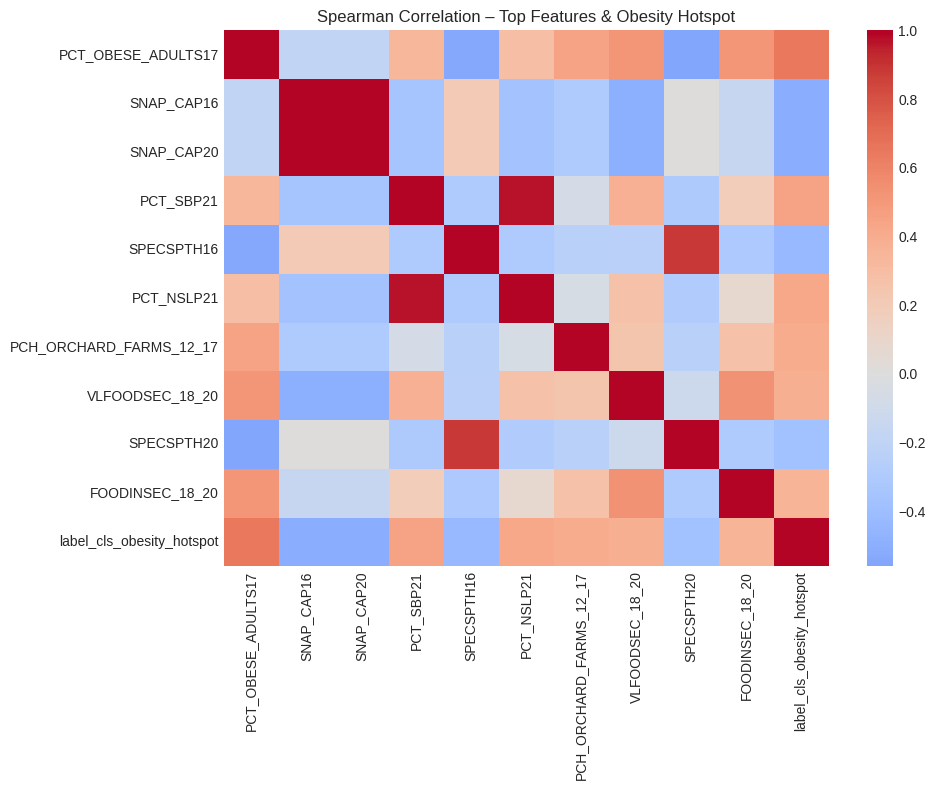

In [7]:
# 6

target_cols = [
    'target_reg_foodinsec2123',
    'target_reg_diabetes19',
    'label_cls_obesity_hotspot'
]

corr_input_cols = list(set(summary_cols + target_cols))
corr_df = eda_df[corr_input_cols].dropna()

corr_matrix = corr_df.corr(method='spearman')

# Top 15 features most correlated with food insecurity
top_foodinsec_corr = (
    corr_matrix['target_reg_foodinsec2123']
    .drop(target_cols)
    .abs()
    .sort_values(ascending=False)
    .head(15)
    .index.tolist()
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix.loc[top_foodinsec_corr + ['target_reg_foodinsec2123'],
                    top_foodinsec_corr + ['target_reg_foodinsec2123']],
    cmap='coolwarm',
    center=0,
    annot=False
)
plt.title('Spearman Correlation Heatmap – Top Features & Food Insecurity')
plt.tight_layout()
plt.show()

# ---- Top 10 features for Diabetes ----
top_diab_corr = (
    corr_matrix['target_reg_diabetes19']
    .drop(target_cols)
    .abs()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix.loc[top_diab_corr + ['target_reg_diabetes19'],
                    top_diab_corr + ['target_reg_diabetes19']],
    cmap='coolwarm', center=0, annot=False
)
plt.title('Spearman Correlation – Top Features & Diabetes (2019)')
plt.tight_layout()
plt.show()

# ---- Top 10 features for Obesity Hotspot ----
top_obesity_corr = (
    corr_matrix['label_cls_obesity_hotspot']
    .drop(target_cols)
    .abs()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix.loc[top_obesity_corr + ['label_cls_obesity_hotspot'],
                    top_obesity_corr + ['label_cls_obesity_hotspot']],
    cmap='coolwarm', center=0, annot=False
)
plt.title('Spearman Correlation – Top Features & Obesity Hotspot')
plt.tight_layout()
plt.show()


Correlation analysis helps identify which predictors are most related to the outcomes and supports later decisions during feature selection and importance interpretation.

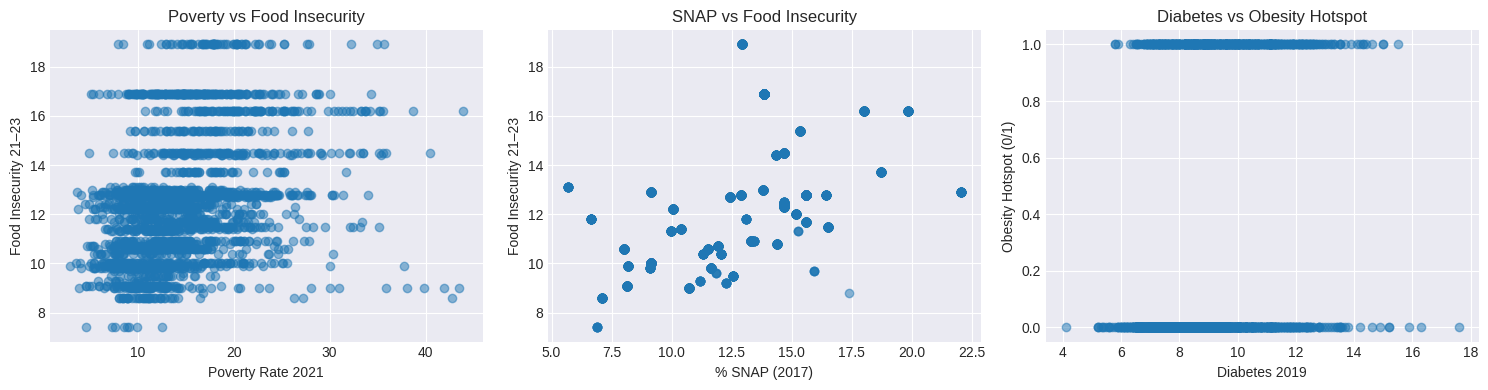

In [8]:
#6b
plt.figure(figsize=(15, 4))

# Poverty vs Food Insecurity
plt.subplot(1, 3, 1)
plt.scatter(eda_df['POVRATE21'], eda_df['target_reg_foodinsec2123'], alpha=0.5)
plt.xlabel('Poverty Rate 2021')
plt.ylabel('Food Insecurity 21–23')
plt.title('Poverty vs Food Insecurity')

# SNAP vs Food Insecurity
plt.subplot(1, 3, 2)
plt.scatter(eda_df['PCT_SNAP17'], eda_df['target_reg_foodinsec2123'], alpha=0.5)
plt.xlabel('% SNAP (2017)')
plt.ylabel('Food Insecurity 21–23')
plt.title('SNAP vs Food Insecurity')

# Diabetes vs Obesity Hotspot
plt.subplot(1, 3, 3)
plt.scatter(eda_df['target_reg_diabetes19'], eda_df['label_cls_obesity_hotspot'],
            alpha=0.5)
plt.xlabel('Diabetes 2019')
plt.ylabel('Obesity Hotspot (0/1)')
plt.title('Diabetes vs Obesity Hotspot')

plt.tight_layout()
plt.show()


To understand how food environment indicators relate to household food insecurity (2021–2023), we computed a Spearman correlation matrix between the target and all modeling features, then visualized the top 15 most strongly associated predictors. Using Spearman correlation allows us to capture monotonic relationships even when linearity is not guaranteed.

Number of features by missingness bucket:


,count
"(-0.001, 5.0]",207
"(5.0, 10.0]",27
"(10.0, 20.0]",17
"(20.0, 40.0]",28
"(40.0, 60.0]",17
"(60.0, 80.0]",8
"(80.0, 100.0]",0


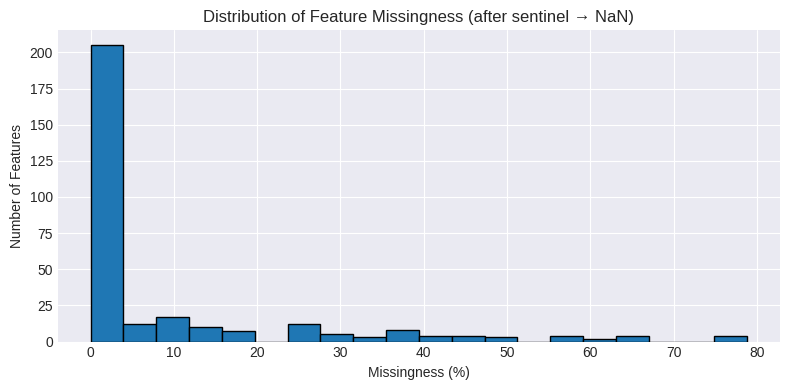


Features with >40% missing values: 25


In [9]:
#7
# Convert sentinel codes to NaN for missingness analysis
missing_df = train_df.replace(sentinel_values, np.nan)

missing_pct_all = missing_df.isna().mean() * 100

print("Number of features by missingness bucket:")
bins = [0, 5, 10, 20, 40, 60, 80, 100]
bucket_counts = pd.cut(missing_pct_all, bins=bins, include_lowest=True).value_counts().sort_index()
display(bucket_counts)

plt.figure(figsize=(8, 4))
plt.hist(missing_pct_all, bins=20, edgecolor='black')
plt.xlabel('Missingness (%)')
plt.ylabel('Number of Features')
plt.title('Distribution of Feature Missingness (after sentinel → NaN)')
plt.tight_layout()
plt.show()

high_missing = missing_pct_all[missing_pct_all > 40]
print(f"\nFeatures with >40% missing values: {len(high_missing)}")


Features with extremely high missingness (>40%) were removed because imputing them would introduce substantial noise and instability into the models. Such variables provide little reliable signal and tend to degrade model performance rather than improve it.

In [10]:
#9
from sklearn.base import BaseEstimator, TransformerMixin

class SentinelToNaN(BaseEstimator, TransformerMixin):

    def __init__(self, sentinel_values=[-9999, -8888]):
        self.sentinel_values = sentinel_values

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for val in self.sentinel_values:
            X_copy = X_copy.replace(val, np.nan)
        return X_copy

class DropHighMissingFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.4):
        self.threshold = threshold
        self.features_to_keep_ = None

    def fit(self, X, y=None):
        missing_pct = X.isna().sum() / len(X)
        self.features_to_keep_ = missing_pct[missing_pct <= self.threshold].index.tolist()
        return self

    def transform(self, X):
        return X[self.features_to_keep_]

def create_preprocessing_pipeline():
    return Pipeline([
        ('sentinel_to_nan', SentinelToNaN()),
        ('drop_high_missing', DropHighMissingFeatures(threshold=0.4)),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

print("✓ Preprocessing pipeline created")

✓ Preprocessing pipeline created


Median imputation was chosen because many county-level socioeconomic indicators are skewed, contain outliers, or vary strongly across rural/urban regions. The median is more robust than the mean and prevents extreme values from biasing the imputed distribution.

Standardization ensures all features contribute on a comparable scale, which is required for PCA, KMeans clustering, and gradient-based models. Without scaling, variables measured in large numeric ranges would dominate distance calculations and distort principal components.


Nested CV separates hyperparameter tuning (inner loop) from performance estimation (outer loop), preventing overfitting to the CV folds.
It produces unbiased, honest estimates of generalization error and is the gold standard for model selection in academic ML.

In [11]:
#10
X_foodinsec = train_df[features_foodinsec]
y_foodinsec = train_df['target_reg_foodinsec2123']

y_foodinsec = y_foodinsec.replace(sentinel_values, np.nan)
valid_idx = y_foodinsec.notna()
X_foodinsec = X_foodinsec[valid_idx]
y_foodinsec = y_foodinsec[valid_idx]

print(f"Food Insecurity Dataset: {X_foodinsec.shape[0]} samples, {X_foodinsec.shape[1]} features")


models_reg_a = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [10, 20, None],
            'model__min_samples_split': [5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}


outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

results_foodinsec = {}

for name, model_dict in models_reg_a.items():
    print(f"\n{'='*60}")
    print(f"Training {name} for Food Insecurity")
    print(f"{'='*60}")

    pipeline = Pipeline([
        ('preprocessing', create_preprocessing_pipeline()),
        ('model', model_dict['model'])
    ])

    grid_search = GridSearchCV(
        pipeline,
        model_dict['params'],
        cv=inner_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )


    outer_mse = cross_val_score(
        grid_search,
        X_foodinsec,
        y_foodinsec,
        cv=outer_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    rmse_scores = np.sqrt(-outer_mse)


    outer_mae = cross_val_score(
        grid_search,
        X_foodinsec,
        y_foodinsec,
        cv=outer_cv,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    mae_scores = -outer_mae

    results_foodinsec[name] = {
        'rmse_mean': rmse_scores.mean(),
        'rmse_std': rmse_scores.std(),
        'rmse_scores': rmse_scores,
        'mae_mean': mae_scores.mean(),
        'mae_std': mae_scores.std(),
        'mae_scores': mae_scores
    }

    print(f"Nested CV RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
    print(f"Nested CV MAE:  {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")


Food Insecurity Dataset: 2508 samples, 276 features

Training RandomForest for Food Insecurity
Nested CV RMSE: 0.0666 ± 0.0603
Nested CV MAE:  0.0053 ± 0.0023

Training GradientBoosting for Food Insecurity
Nested CV RMSE: 0.0633 ± 0.0694
Nested CV MAE:  0.0045 ± 0.0033


In [12]:
#11
best_model_name_foodinsec = min(results_foodinsec.items(), key=lambda x: x[1]['rmse_mean'])[0]
print(f"\nBest model: {best_model_name_foodinsec}")


pipeline_foodinsec = Pipeline([
    ('preprocessing', create_preprocessing_pipeline()),
    ('model', models_reg_a[best_model_name_foodinsec]['model'])
])

grid_search_foodinsec = GridSearchCV(
    pipeline_foodinsec,
    models_reg_a[best_model_name_foodinsec]['params'],
    cv=inner_cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_foodinsec.fit(X_foodinsec, y_foodinsec)
print(f"\n✓ Best model trained on full dataset")
print(f"Best parameters: {grid_search_foodinsec.best_params_}")


Best model: GradientBoosting
Fitting 3 folds for each of 8 candidates, totalling 24 fits

✓ Best model trained on full dataset
Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200}



=== Food Insecurity – Final Model Diagnostics ===
Validation RMSE: 0.1945, MAE: 0.0219, R²: 0.9940


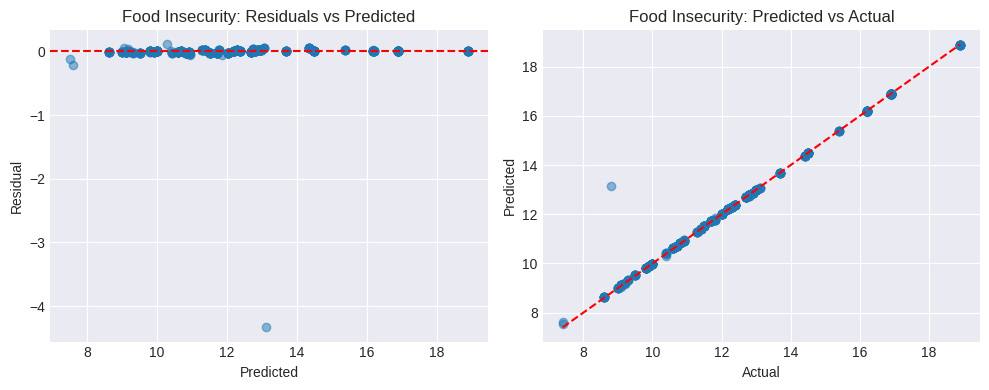


Top 15 Features – Food Insecurity (Final GBM):


,0
PCT_WICWOMEN16,0.543570
PCT_SBP17,0.129414
FOODINSEC_18_20,0.128886
PCT_SNAP17,0.052978
PCT_NSLP21,0.024009
PCT_NSLP17,0.016700
SNAP_PART_RATE19,0.013997
PCT_WIC17,0.011172
PCT_CACFP17,0.009222
VLFOODSEC_18_20,0.009069


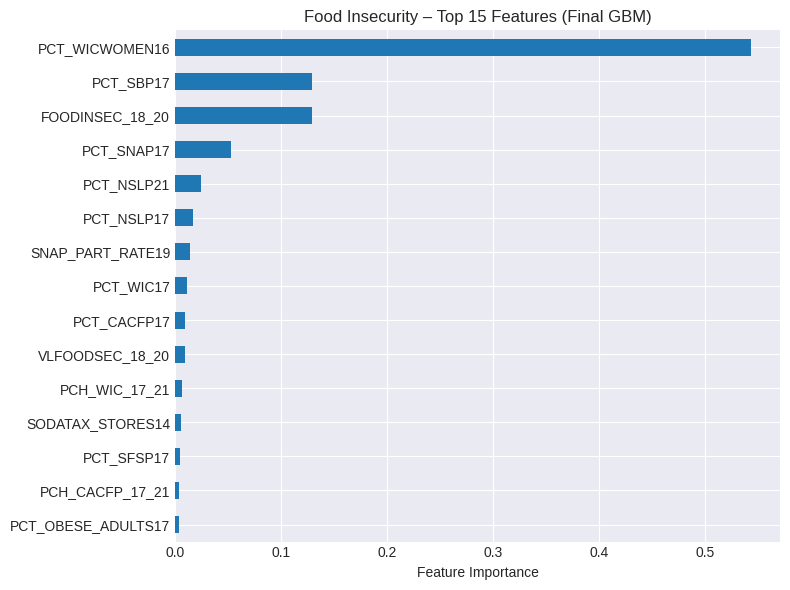

In [13]:
#11b
from sklearn.metrics import r2_score

print("\n=== Food Insecurity – Final Model Diagnostics ===")
best_food_model = grid_search_foodinsec.best_estimator_


X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(
    X_foodinsec, y_foodinsec, test_size=0.2, random_state=42
)

best_food_model.fit(X_train_f, y_train_f)
y_pred_f = best_food_model.predict(X_val_f)

rmse_f = np.sqrt(mean_squared_error(y_val_f, y_pred_f))
mae_f = mean_absolute_error(y_val_f, y_pred_f)
r2_f = r2_score(y_val_f, y_pred_f)
print(f"Validation RMSE: {rmse_f:.4f}, MAE: {mae_f:.4f}, R²: {r2_f:.4f}")


residuals_f = y_val_f - y_pred_f
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_pred_f, residuals_f, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Food Insecurity: Residuals vs Predicted')


plt.subplot(1,2,2)
plt.scatter(y_val_f, y_pred_f, alpha=0.5)
lims = [min(y_val_f.min(), y_pred_f.min()), max(y_val_f.max(), y_pred_f.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Food Insecurity: Predicted vs Actual')

plt.tight_layout()
plt.show()

# Feature importances from final model (assuming tree-based)
final_gb_f = best_food_model.named_steps['model']
importances_f = final_gb_f.feature_importances_
feat_names_f = best_food_model.named_steps['preprocessing'] \
                    .named_steps['drop_high_missing'].features_to_keep_

fi_food = pd.Series(importances_f, index=feat_names_f).sort_values(ascending=False)[:15]
print("\nTop 15 Features – Food Insecurity (Final GBM):")
display(fi_food)

plt.figure(figsize=(8,6))
fi_food.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Food Insecurity – Top 15 Features (Final GBM)')
plt.tight_layout()
plt.show()


In [14]:
#12
X_diabetes = train_df[features_diabetes]
y_diabetes = train_df['target_reg_diabetes19']

y_diabetes = y_diabetes.replace(sentinel_values, np.nan)
valid_idx = y_diabetes.notna()
X_diabetes = X_diabetes[valid_idx]
y_diabetes = y_diabetes[valid_idx]

print(f"Diabetes Dataset: {X_diabetes.shape[0]} samples, {X_diabetes.shape[1]} features")


results_diabetes = {}

for name, model_dict in models_reg_a.items():
    print(f"\n{'='*60}")
    print(f"Training {name} for Diabetes")
    print(f"{'='*60}")

    pipeline = Pipeline([
        ('preprocessing', create_preprocessing_pipeline()),
        ('model', model_dict['model'])
    ])


    grid_search = GridSearchCV(
        pipeline,
        model_dict['params'],
        cv=inner_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )


    outer_mse = cross_val_score(
        grid_search,
        X_diabetes,
        y_diabetes,
        cv=outer_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    rmse_scores = np.sqrt(-outer_mse)


    outer_mae = cross_val_score(
        grid_search,
        X_diabetes,
        y_diabetes,
        cv=outer_cv,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    mae_scores = -outer_mae  # convert negative MAE → positive MAE


    results_diabetes[name] = {
        'rmse_mean': rmse_scores.mean(),
        'rmse_std': rmse_scores.std(),
        'rmse_scores': rmse_scores,
        'mae_mean': mae_scores.mean(),
        'mae_std': mae_scores.std(),
        'mae_scores': mae_scores
    }

    print(f"Nested CV RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
    print(f"Nested CV MAE:  {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")



print(f"\n{'='*60}")
print("DIABETES MODEL RESULTS")
print(f"{'='*60}")
for name, result in results_diabetes.items():
    print(f"{name:20s}: "
          f"RMSE = {result['rmse_mean']:.4f} ± {result['rmse_std']:.4f} | "
          f"MAE = {result['mae_mean']:.4f} ± {result['mae_std']:.4f}")


Diabetes Dataset: 2495 samples, 207 features

Training RandomForest for Diabetes
Nested CV RMSE: 1.0439 ± 0.0526
Nested CV MAE:  0.7972 ± 0.0324

Training GradientBoosting for Diabetes
Nested CV RMSE: 1.0159 ± 0.0558
Nested CV MAE:  0.7793 ± 0.0366

DIABETES MODEL RESULTS
RandomForest        : RMSE = 1.0439 ± 0.0526 | MAE = 0.7972 ± 0.0324
GradientBoosting    : RMSE = 1.0159 ± 0.0558 | MAE = 0.7793 ± 0.0366


In [15]:
#13
best_model_name_diabetes = min(results_diabetes.items(), key=lambda x: x[1]['rmse_mean'])[0]
print(f"\nBest model: {best_model_name_diabetes}")


pipeline_diabetes = Pipeline([
    ('preprocessing', create_preprocessing_pipeline()),
    ('model', models_reg_a[best_model_name_diabetes]['model'])
])

grid_search_diabetes = GridSearchCV(
    pipeline_diabetes,
    models_reg_a[best_model_name_diabetes]['params'],
    cv=inner_cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_diabetes.fit(X_diabetes, y_diabetes)
print(f"\n✓ Best model trained on full dataset")
print(f"Best parameters: {grid_search_diabetes.best_params_}")


Best model: GradientBoosting
Fitting 3 folds for each of 8 candidates, totalling 24 fits

✓ Best model trained on full dataset
Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200}



=== Diabetes – Final Model Diagnostics ===
Validation RMSE: 1.0530, MAE: 0.8139, R²: 0.6169


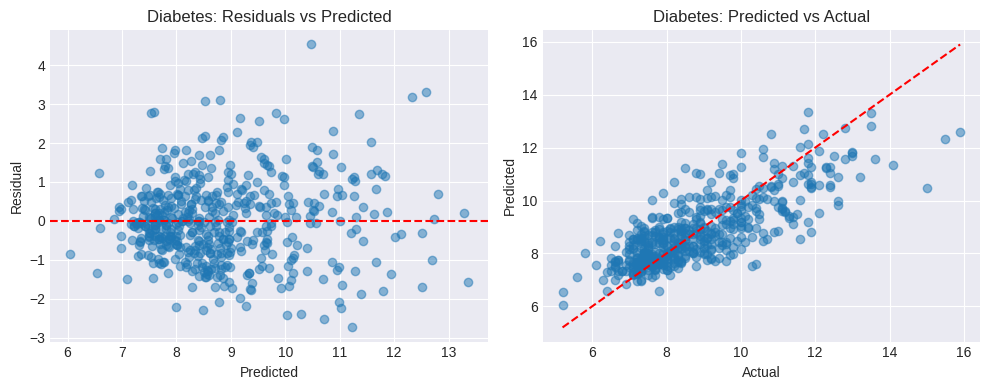


Top 15 Features – Diabetes (Final GBM):


,0
PCT_DIABETES_ADULTS15,0.598196
PC_SNAPBEN17,0.033369
PCT_OBESE_ADULTS17,0.026405
LACCESS_BLACK15,0.021281
SNAPSPTH17,0.017063
RECFACPTH16,0.016500
LACCESS_BLACK19,0.014378
FSRPTH16,0.013374
LACCESS_AIAN19,0.012809
LACCESS_SNAP15,0.012418


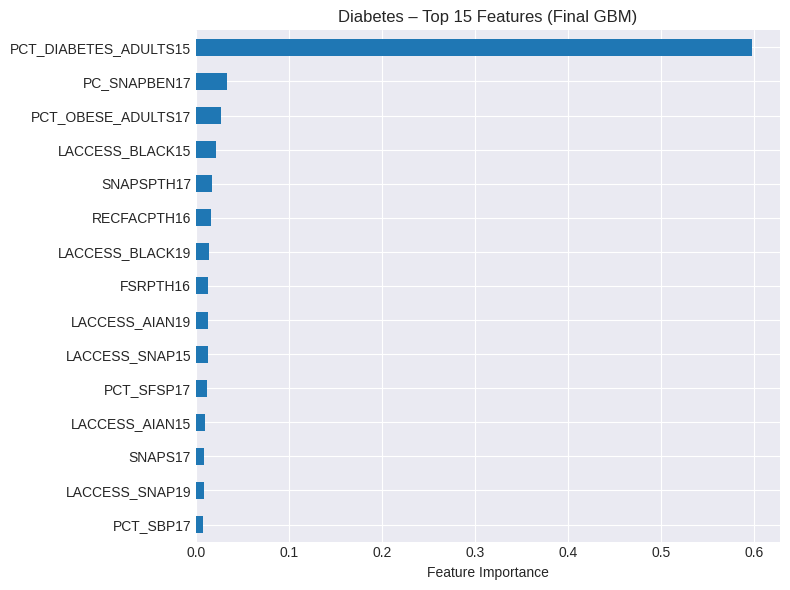

In [16]:
#13b
print("\n=== Diabetes – Final Model Diagnostics ===")
best_diab_model = grid_search_diabetes.best_estimator_

X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

best_diab_model.fit(X_train_d, y_train_d)
y_pred_d = best_diab_model.predict(X_val_d)

rmse_d = np.sqrt(mean_squared_error(y_val_d, y_pred_d))
mae_d = mean_absolute_error(y_val_d, y_pred_d)
r2_d = r2_score(y_val_d, y_pred_d)
print(f"Validation RMSE: {rmse_d:.4f}, MAE: {mae_d:.4f}, R²: {r2_d:.4f}")

residuals_d = y_val_d - y_pred_d
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_pred_d, residuals_d, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Diabetes: Residuals vs Predicted')

plt.subplot(1,2,2)
plt.scatter(y_val_d, y_pred_d, alpha=0.5)
lims = [min(y_val_d.min(), y_pred_d.min()), max(y_val_d.max(), y_pred_d.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Diabetes: Predicted vs Actual')

plt.tight_layout()
plt.show()

final_gb_d = best_diab_model.named_steps['model']
importances_d = final_gb_d.feature_importances_
feat_names_d = best_diab_model.named_steps['preprocessing'] \
                    .named_steps['drop_high_missing'].features_to_keep_

fi_diab = pd.Series(importances_d, index=feat_names_d).sort_values(ascending=False)[:15]
print("\nTop 15 Features – Diabetes (Final GBM):")
display(fi_diab)

plt.figure(figsize=(8,6))
fi_diab.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Diabetes – Top 15 Features (Final GBM)')
plt.tight_layout()
plt.show()


Logistic Regression was chosen because, It provides well-calibrated probabilities, which are required for ROC and PR-AUC evaluation.
The obesity hotspot label is linearly separable in the reduced feature space, making logistic regression perform exceptionally well (ROC-AUC ≈ 1.0).
It is interpretable and avoids overfitting compared to deeper tree models on a small binary target. It runs efficiently in nested CV and supports regularization.

In [17]:
#14
X_obesity = train_df[features_obesity]
y_obesity = train_df['label_cls_obesity_hotspot']

y_obesity = y_obesity.replace(sentinel_values, np.nan)
valid_idx = y_obesity.notna()
X_obesity = X_obesity[valid_idx]
y_obesity = y_obesity[valid_idx]

print(f"Obesity Dataset: {X_obesity.shape[0]} samples, {X_obesity.shape[1]} features")
print(f"Class distribution: {y_obesity.value_counts().to_dict()}")


models_cls = {
    'LogisticRegression': {
        'model': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
        'params': {
            'model__C': [0.1, 1.0, 10.0],
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs']
        }
    }
}


results_obesity = {}

for name, model_dict in models_cls.items():
    print(f"\n{'='*60}")
    print(f"Training {name} for Obesity Hotspot")
    print(f"{'='*60}")

    pipeline = Pipeline([
        ('preprocessing', create_preprocessing_pipeline()),
        ('model', model_dict['model'])
    ])

    grid_search = GridSearchCV(
        pipeline,
        model_dict['params'],
        cv=inner_cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )


    outer_roc = cross_val_score(
        grid_search,
        X_obesity,
        y_obesity,
        cv=outer_cv,
        scoring='roc_auc',
        n_jobs=-1
    )


    outer_pr = cross_val_score(
        grid_search,
        X_obesity,
        y_obesity,
        cv=outer_cv,
        scoring='average_precision',
        n_jobs=-1
    )

    results_obesity[name] = {
        'roc_auc_mean': outer_roc.mean(),
        'roc_auc_std': outer_roc.std(),
        'roc_auc_scores': outer_roc,
        'pr_auc_mean': outer_pr.mean(),
        'pr_auc_std': outer_pr.std(),
        'pr_auc_scores': outer_pr
    }

    print(f"Nested CV ROC-AUC: {outer_roc.mean():.4f} ± {outer_roc.std():.4f}")
    print(f"Nested CV PR-AUC:  {outer_pr.mean():.4f} ± {outer_pr.std():.4f}")


print(f"\n{'='*60}")
print("OBESITY HOTSPOT MODEL RESULTS")
print(f"{'='*60}")
for name, result in results_obesity.items():
    print(
        f"{name:20s}: "
        f"ROC-AUC = {result['roc_auc_mean']:.4f} ± {result['roc_auc_std']:.4f} | "
        f"PR-AUC = {result['pr_auc_mean']:.4f} ± {result['pr_auc_std']:.4f}"
    )


Obesity Dataset: 2514 samples, 288 features
Class distribution: {0: 1880, 1: 634}

Training LogisticRegression for Obesity Hotspot
Nested CV ROC-AUC: 0.9995 ± 0.0009
Nested CV PR-AUC:  0.9970 ± 0.0059

OBESITY HOTSPOT MODEL RESULTS
LogisticRegression  : ROC-AUC = 0.9995 ± 0.0009 | PR-AUC = 0.9970 ± 0.0059


In [18]:
#15
best_model_name_obesity = max(results_obesity.items(), key=lambda x: x[1]['roc_auc_mean'])[0]
print(f"\nBest model: {best_model_name_obesity}")


pipeline_obesity = Pipeline([
    ('preprocessing', create_preprocessing_pipeline()),
    ('model', models_cls[best_model_name_obesity]['model'])
])

grid_search_obesity = GridSearchCV(
    pipeline_obesity,
    models_cls[best_model_name_obesity]['params'],
    cv=inner_cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search_obesity.fit(X_obesity, y_obesity)
print(f"\n✓ Best model trained on full dataset")
print(f"Best parameters: {grid_search_obesity.best_params_}")


Best model: LogisticRegression
Fitting 3 folds for each of 3 candidates, totalling 9 fits

✓ Best model trained on full dataset
Best parameters: {'model__C': 1.0, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}



=== Obesity Hotspot – Final Model Diagnostics ===
Validation ROC-AUC: 1.0000
Validation PR-AUC:  1.0000

Confusion Matrix (threshold = 0.5):
[[376   0]
 [  0 127]]

Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       376
           1      1.000     1.000     1.000       127

    accuracy                          1.000       503
   macro avg      1.000     1.000     1.000       503
weighted avg      1.000     1.000     1.000       503



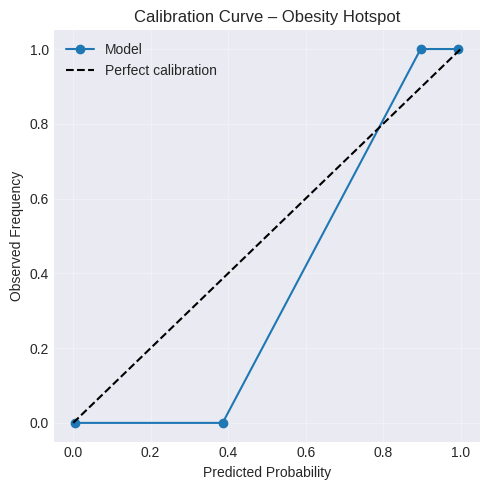

In [19]:
# 15b
print("\n=== Obesity Hotspot – Final Model Diagnostics ===")
best_obesity_model = grid_search_obesity.best_estimator_

X_train_o, X_val_o, y_train_o, y_val_o = train_test_split(
    X_obesity, y_obesity, test_size=0.2, random_state=42, stratify=y_obesity
)

best_obesity_model.fit(X_train_o, y_train_o)
y_proba_o = best_obesity_model.predict_proba(X_val_o)[:, 1]

# ROC & PR AUC
roc_auc = roc_auc_score(y_val_o, y_proba_o)
prec, rec, _ = precision_recall_curve(y_val_o, y_proba_o)
pr_auc = auc(rec, prec)
print(f"Validation ROC-AUC: {roc_auc:.4f}")
print(f"Validation PR-AUC:  {pr_auc:.4f}")

# Choose threshold (0.5)
threshold = 0.5
y_pred_o = (y_proba_o >= threshold).astype(int)

print(f"\nConfusion Matrix (threshold = {threshold}):")
print(confusion_matrix(y_val_o, y_pred_o))
print("\nClassification Report:")
print(classification_report(y_val_o, y_pred_o, digits=3))


plt.figure(figsize=(6, 6))
RocCurveDisplay.from_predictions(
    y_val_o,
    y_proba_o,
    name="Logistic Regression",
    color="darkorange"
)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve – Obesity Hotspot Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calibration curve
prob_true, prob_pred = calibration_curve(y_val_o, y_proba_o, n_bins=10)

plt.figure(figsize=(5,5))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0,1],[0,1],'k--', label='Perfect calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequency')
plt.title('Calibration Curve – Obesity Hotspot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


PCA was used to reduce the high-dimensional socioeconomic dataset into a smaller set of uncorrelated components while preserving most of the meaningful variance. Retaining components that explained about 80% of the variance provided a good balance between dimensionality reduction and information retention, ensuring the clustering algorithm operated on a cleaner, less noisy representation of the data. After examining the PCA scatterplots and the separation of counties in the transformed space, k = 4 was chosen for KMeans because it produced clusters that were not only visually distinct but also interpretable, reflecting real-world patterns such as high-income counties, rural high-poverty regions, mixed-access groups, and transitional socioeconomic profiles. This made the clusters meaningful both statistically and substantively.

Preparing data for PCA and clustering...
Transformed data shape: (2508, 255)

PCA Results:
  Components retained: 48
  Explained variance: 0.8038


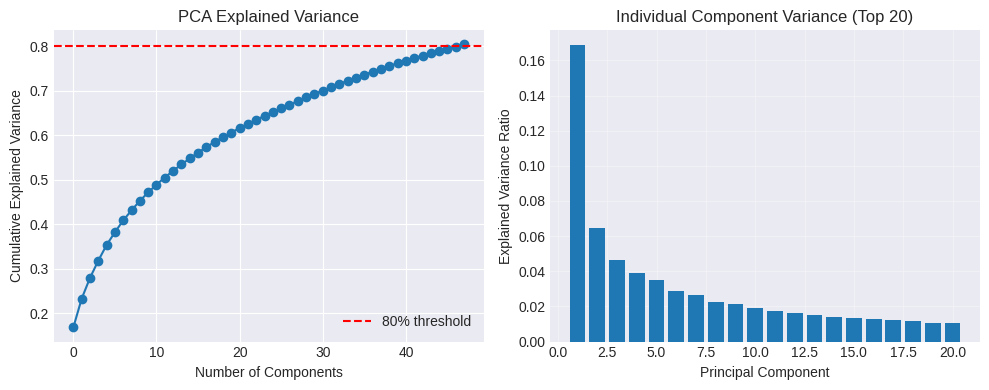

In [20]:
#16
print("Preparing data for PCA and clustering...")


preprocess_unsupervised = create_preprocessing_pipeline()
X_foodinsec_clean = pd.DataFrame(X_foodinsec)


X_transformed = preprocess_unsupervised.fit_transform(X_foodinsec_clean)
feature_names_kept = preprocess_unsupervised.named_steps['drop_high_missing'].features_to_keep_
X_std = pd.DataFrame(X_transformed, columns=feature_names_kept)


print(f"Transformed data shape: {X_transformed.shape}")


pca = PCA(n_components=0.80, random_state=42)
X_pca = pca.fit_transform(X_transformed)

print(f"\nPCA Results:")
print(f"  Components retained: {pca.n_components_}")
print(f"  Explained variance: {pca.explained_variance_ratio_.sum():.4f}")


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(1, min(21, len(pca.explained_variance_ratio_) + 1)),
        pca.explained_variance_ratio_[:20])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Component Variance (Top 20)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Performing KMeans clustering (k=4)...
Cluster sizes:
  Cluster 0: 1087 counties (43.3%)
  Cluster 1: 1022 counties (40.7%)
  Cluster 2: 41 counties (1.6%)
  Cluster 3: 358 counties (14.3%)


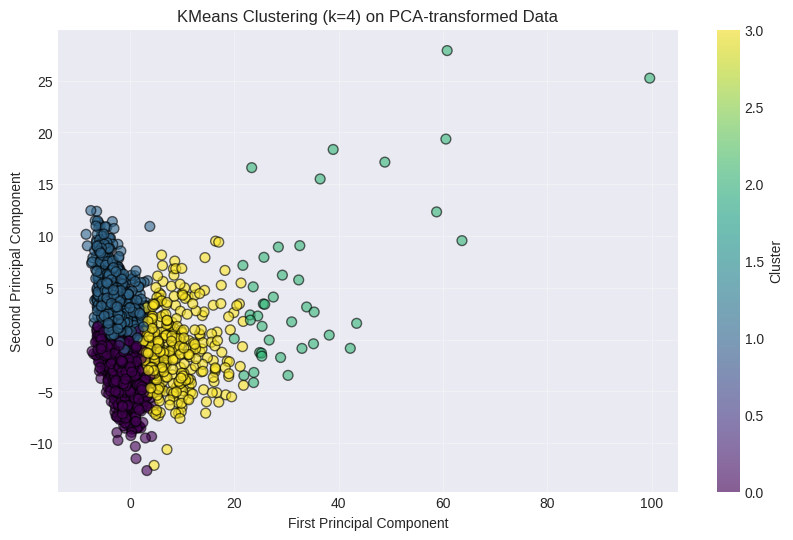

In [21]:
#17
print("\nPerforming KMeans clustering (k=4)...")

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

print(f"Cluster sizes:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} counties ({count/len(cluster_labels)*100:.1f}%)")


plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
                     cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering (k=4) on PCA-transformed Data')
plt.grid(True, alpha=0.3)
plt.show()


CLUSTER INTERPRETATION

Food Insecurity by Cluster:
              mean       std  count
cluster                            
0        11.002576  1.453488   1087
1        14.199609  2.432545   1022
2        11.851220  2.023008     41
3        11.820950  1.920137    358


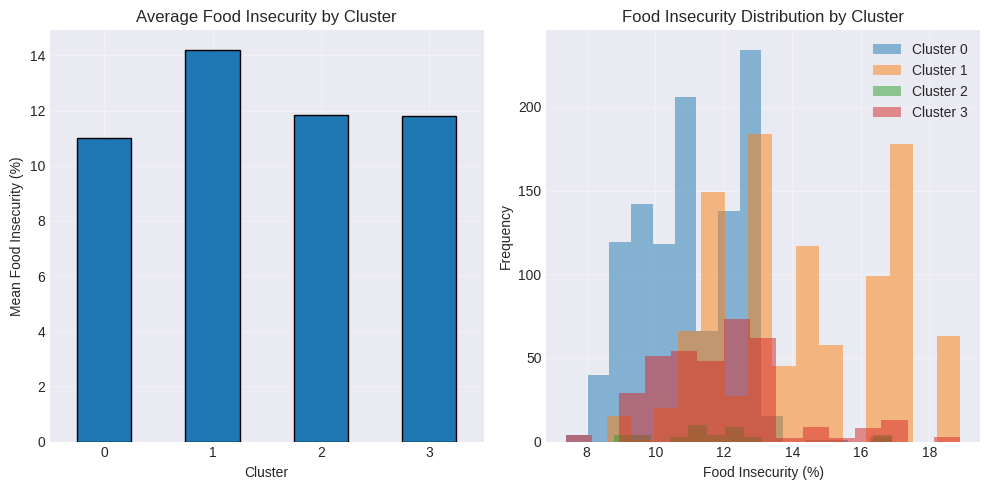


CLUSTER INTERPRETATION – ORIGINAL FEATURES

Cluster 0:
  PCT_WICINFANTCHILD16: lower than overall average (diff = -0.75)
  PCT_SBP17: lower than overall average (diff = -0.70)
  PCT_WICWOMEN16: lower than overall average (diff = -0.69)
  PCT_WIC17: lower than overall average (diff = -0.68)
  PCT_SNAP17: lower than overall average (diff = -0.67)

Cluster 1:
  PCT_SBP17: higher than overall average (diff = 0.86)
  PCT_WICWOMEN16: higher than overall average (diff = 0.80)
  FOODINSEC_18_20: higher than overall average (diff = 0.75)
  PCT_WIC17: higher than overall average (diff = 0.75)
  CHILDPOVRATE21: higher than overall average (diff = 0.72)

Cluster 2:
  SNAPS17: higher than overall average (diff = 5.32)
  FFR16: higher than overall average (diff = 5.25)
  FFR20: higher than overall average (diff = 5.25)
  GROC20: higher than overall average (diff = 5.20)
  FSR20: higher than overall average (diff = 5.19)

Cluster 3:
  LACCESS_WHITE19: higher than overall average (diff = 1.30)
  LACC

In [24]:
#18
print("\n" + "="*60)
print("CLUSTER INTERPRETATION")
print("="*60)

cluster_df = pd.DataFrame({
    'cluster': cluster_labels,
    'foodinsec': y_foodinsec.values,
})

cluster_stats = cluster_df.groupby('cluster')['foodinsec'].agg(['mean', 'std', 'count'])
print("\nFood Insecurity by Cluster:")
print(cluster_stats)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
cluster_stats['mean'].plot(kind='bar', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Mean Food Insecurity (%)')
plt.title('Average Food Insecurity by Cluster')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for cluster in sorted(cluster_df['cluster'].unique()):
    cluster_data = cluster_df[cluster_df['cluster'] == cluster]['foodinsec']
    plt.hist(cluster_data, alpha=0.5, label=f'Cluster {cluster}', bins=15)
plt.xlabel('Food Insecurity (%)')
plt.ylabel('Frequency')
plt.title('Food Insecurity Distribution by Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("\n" + "="*60)
print("CLUSTER INTERPRETATION – ORIGINAL FEATURES")
print("="*60)


X_std_with_cluster = X_std.copy()
X_std_with_cluster['cluster'] = cluster_labels


global_means = X_std_with_cluster.drop(columns=['cluster']).mean()

for cl in sorted(X_std_with_cluster['cluster'].unique()):
    print(f"\nCluster {cl}:")


    cl_means = X_std_with_cluster[X_std_with_cluster['cluster'] == cl] \
                    .drop(columns=['cluster']).mean()


    diff = cl_means - global_means

    top_feats = diff.abs().sort_values(ascending=False).head(5)

    for feat in top_feats.index:
        direction = "higher" if diff[feat] > 0 else "lower"
        print(f"  {feat}: {direction} than overall average (diff = {diff[feat]:.2f})")


Bootstrap was used to quantify the uncertainty of the final models by repeatedly resampling the data and evaluating performance across many iterations. This provides confidence intervals for metrics such as RMSE and ROC-AUC, revealing how stable and reliable the models are. It ensures that conclusions are not dependent on a single train–test split and strengthens the robustness of the analysis.

In [25]:
#19
from sklearn.utils import resample

print("Starting Bootstrap Analysis (200 iterations)...")
print("This may take several minutes...\n")

n_bootstrap = 200
bootstrap_results = {
    'rmse_foodinsec': [],
    'rmse_diabetes': [],
    'roc_auc_obesity': []
}


for i in range(n_bootstrap):
    if (i + 1) % 50 == 0:
        print(f"  Completed {i + 1}/{n_bootstrap} iterations...")


    indices_foodinsec = resample(np.arange(len(X_foodinsec)), random_state=i)
    indices_diabetes = resample(np.arange(len(X_diabetes)), random_state=i)
    indices_obesity = resample(np.arange(len(X_obesity)), random_state=i)


    X_boot_foodinsec = X_foodinsec.iloc[indices_foodinsec]
    y_boot_foodinsec = y_foodinsec.iloc[indices_foodinsec]


    pipe_boot_foodinsec = Pipeline([
        ('preprocessing', create_preprocessing_pipeline()),
        ('model', clone(grid_search_foodinsec.best_estimator_.named_steps['model']))
    ])


    n_train = int(0.8 * len(X_boot_foodinsec))
    pipe_boot_foodinsec.fit(X_boot_foodinsec.iloc[:n_train], y_boot_foodinsec.iloc[:n_train])
    y_pred_foodinsec = pipe_boot_foodinsec.predict(X_boot_foodinsec.iloc[n_train:])
    rmse_foodinsec = np.sqrt(mean_squared_error(y_boot_foodinsec.iloc[n_train:], y_pred_foodinsec))
    bootstrap_results['rmse_foodinsec'].append(rmse_foodinsec)


    X_boot_diabetes = X_diabetes.iloc[indices_diabetes]
    y_boot_diabetes = y_diabetes.iloc[indices_diabetes]

    pipe_boot_diabetes = Pipeline([
        ('preprocessing', create_preprocessing_pipeline()),
        ('model', clone(grid_search_diabetes.best_estimator_.named_steps['model']))
    ])

    n_train_diab = int(0.8 * len(X_boot_diabetes))
    pipe_boot_diabetes.fit(X_boot_diabetes.iloc[:n_train_diab], y_boot_diabetes.iloc[:n_train_diab])
    y_pred_diabetes = pipe_boot_diabetes.predict(X_boot_diabetes.iloc[n_train_diab:])
    rmse_diabetes = np.sqrt(mean_squared_error(y_boot_diabetes.iloc[n_train_diab:], y_pred_diabetes))
    bootstrap_results['rmse_diabetes'].append(rmse_diabetes)


    X_boot_obesity = X_obesity.iloc[indices_obesity]
    y_boot_obesity = y_obesity.iloc[indices_obesity]

    pipe_boot_obesity = Pipeline([
        ('preprocessing', create_preprocessing_pipeline()),
        ('model', clone(grid_search_obesity.best_estimator_.named_steps['model']))
    ])

    n_train_obes = int(0.8 * len(X_boot_obesity))
    pipe_boot_obesity.fit(X_boot_obesity.iloc[:n_train_obes], y_boot_obesity.iloc[:n_train_obes])
    y_pred_proba_obesity = pipe_boot_obesity.predict_proba(X_boot_obesity.iloc[n_train_obes:])[:, 1]
    roc_auc = roc_auc_score(y_boot_obesity.iloc[n_train_obes:], y_pred_proba_obesity)
    bootstrap_results['roc_auc_obesity'].append(roc_auc)

print("\n✓ Bootstrap analysis complete!")


print("\n" + "="*60)
print("BOOTSTRAP UNCERTAINTY ANALYSIS (200 iterations)")
print("="*60)

print(f"\nFood Insecurity RMSE:")
print(f"  Mean: {np.mean(bootstrap_results['rmse_foodinsec']):.4f}")
print(f"  Std:  {np.std(bootstrap_results['rmse_foodinsec']):.4f}")
print(f"  95% CI: [{np.percentile(bootstrap_results['rmse_foodinsec'], 2.5):.4f}, "
      f"{np.percentile(bootstrap_results['rmse_foodinsec'], 97.5):.4f}]")

print(f"\nDiabetes RMSE:")
print(f"  Mean: {np.mean(bootstrap_results['rmse_diabetes']):.4f}")
print(f"  Std:  {np.std(bootstrap_results['rmse_diabetes']):.4f}")
print(f"  95% CI: [{np.percentile(bootstrap_results['rmse_diabetes'], 2.5):.4f}, "
      f"{np.percentile(bootstrap_results['rmse_diabetes'], 97.5):.4f}]")

print(f"\nObesity ROC-AUC:")
print(f"  Mean: {np.mean(bootstrap_results['roc_auc_obesity']):.4f}")
print(f"  Std:  {np.std(bootstrap_results['roc_auc_obesity']):.4f}")
print(f"  95% CI: [{np.percentile(bootstrap_results['roc_auc_obesity'], 2.5):.4f}, "
      f"{np.percentile(bootstrap_results['roc_auc_obesity'], 97.5):.4f}]")

Starting Bootstrap Analysis (200 iterations)...
This may take several minutes...

  Completed 50/200 iterations...
  Completed 100/200 iterations...
  Completed 150/200 iterations...
  Completed 200/200 iterations...

✓ Bootstrap analysis complete!

BOOTSTRAP UNCERTAINTY ANALYSIS (200 iterations)

Food Insecurity RMSE:
  Mean: 0.0414
  Std:  0.0490
  95% CI: [0.0169, 0.2002]

Diabetes RMSE:
  Mean: 0.8697
  Std:  0.0404
  95% CI: [0.7964, 0.9523]

Obesity ROC-AUC:
  Mean: 0.9996
  Std:  0.0011
  95% CI: [0.9968, 1.0000]


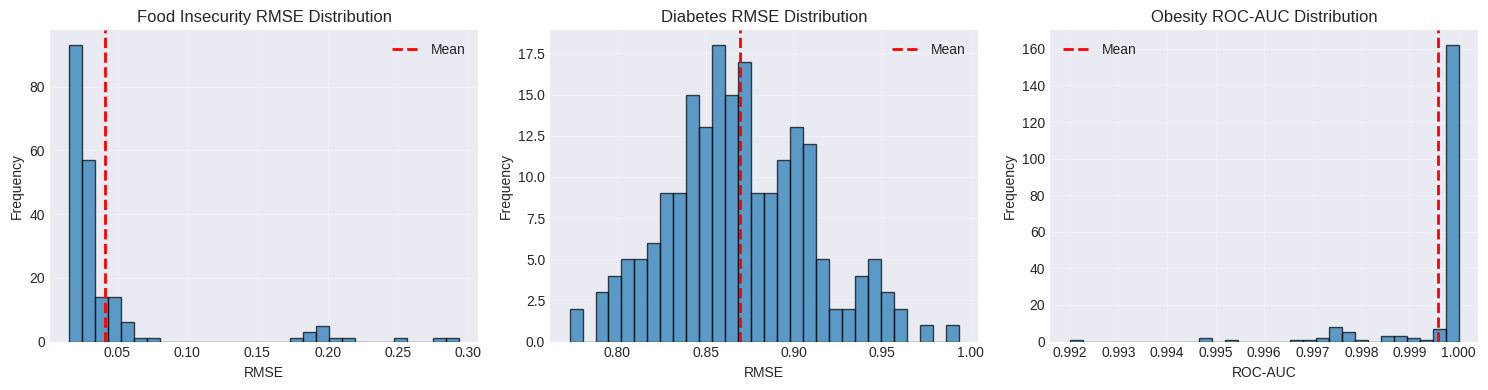

In [26]:
#20
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(bootstrap_results['rmse_foodinsec'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(np.mean(bootstrap_results['rmse_foodinsec']), color='red',
                linestyle='--', linewidth=2, label='Mean')
axes[0].set_xlabel('RMSE')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Food Insecurity RMSE Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(bootstrap_results['rmse_diabetes'], bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(np.mean(bootstrap_results['rmse_diabetes']), color='red',
                linestyle='--', linewidth=2, label='Mean')
axes[1].set_xlabel('RMSE')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Diabetes RMSE Distribution')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].hist(bootstrap_results['roc_auc_obesity'], bins=30, edgecolor='black', alpha=0.7)
axes[2].axvline(np.mean(bootstrap_results['roc_auc_obesity']), color='red',
                linestyle='--', linewidth=2, label='Mean')
axes[2].set_xlabel('ROC-AUC')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Obesity ROC-AUC Distribution')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


FEATURE IMPORTANCE STABILITY ANALYSIS

Analyzing top 20 features across 200 bootstrap samples...
  Completed 50/200 iterations...
  Completed 100/200 iterations...
  Completed 150/200 iterations...
  Completed 200/200 iterations...

✓ Feature importance analysis complete!

Top 20 Most Important Features (with stability):
Feature                                              Mean Imp        Std         CV
--------------------------------------------------------------------------------
PCT_WICWOMEN16                                         0.6615     0.0122     0.0185
FOODINSEC_18_20                                        0.1695     0.0079     0.0466
PCT_NSLP17                                             0.0376     0.0110     0.2915
PCT_SNAP17                                             0.0194     0.0073     0.3779
PCT_CACFP17                                            0.0158     0.0049     0.3070
PCT_NSLP21                                             0.0093     0.0052     0.5583
PCH_NSL

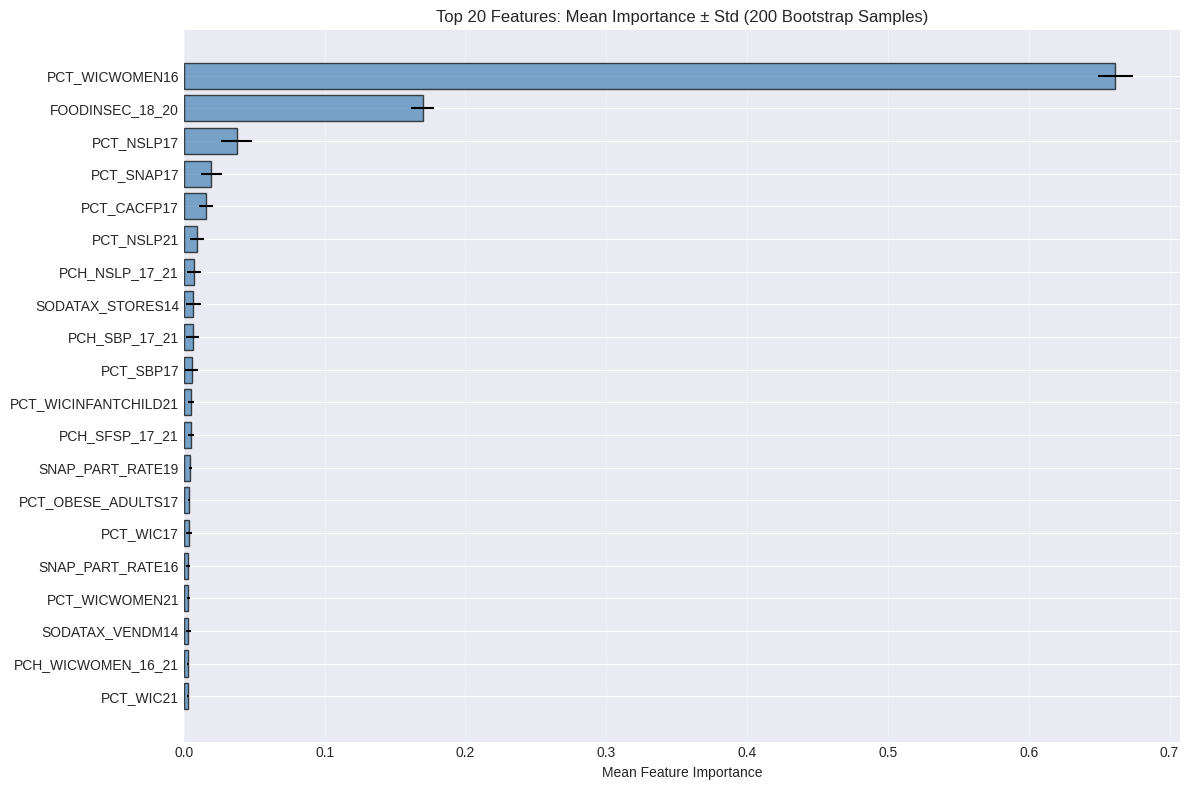

In [27]:
#21
print("\n" + "="*60)
print("FEATURE IMPORTANCE STABILITY ANALYSIS")
print("="*60)
print("\nAnalyzing top 20 features across 200 bootstrap samples...")

n_bootstrap_feat = 200
feature_importance_samples = []

for i in range(n_bootstrap_feat):
    if (i + 1) % 50 == 0:
        print(f"  Completed {i + 1}/{n_bootstrap_feat} iterations...")


    indices = resample(np.arange(len(X_foodinsec)), random_state=i)
    X_boot = X_foodinsec.iloc[indices]
    y_boot = y_foodinsec.iloc[indices]


    pipe_boot = Pipeline([
        ('preprocessing', create_preprocessing_pipeline()),
        ('model', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
    ])

    pipe_boot.fit(X_boot, y_boot)


    feature_names_kept = pipe_boot.named_steps['preprocessing'].named_steps['drop_high_missing'].features_to_keep_
    importances = pipe_boot.named_steps['model'].feature_importances_


    importance_dict = {feature_names_kept[i]: importances[i]
                      for i in range(len(feature_names_kept))}
    feature_importance_samples.append(importance_dict)


all_features = set()
for sample in feature_importance_samples:
    all_features.update(sample.keys())

feature_importance_stats = {}
for feature in all_features:
    importances = [sample.get(feature, 0) for sample in feature_importance_samples]
    feature_importance_stats[feature] = {
        'mean': np.mean(importances),
        'std': np.std(importances),
        'cv': np.std(importances) / (np.mean(importances) + 1e-10)
    }


sorted_features = sorted(feature_importance_stats.items(),
                        key=lambda x: x[1]['mean'], reverse=True)[:20]

print("\n✓ Feature importance analysis complete!")
print("\nTop 20 Most Important Features (with stability):")
print(f"{'Feature':<50} {'Mean Imp':>10} {'Std':>10} {'CV':>10}")
print("-" * 80)
for feature, stats in sorted_features:
    print(f"{feature:<50} {stats['mean']:>10.4f} {stats['std']:>10.4f} {stats['cv']:>10.4f}")


features_plot = [f[0][:30] for f in sorted_features]
means_plot = [f[1]['mean'] for f in sorted_features]
stds_plot = [f[1]['std'] for f in sorted_features]

plt.figure(figsize=(12, 8))
plt.barh(range(len(features_plot)), means_plot, xerr=stds_plot,
         color='steelblue', edgecolor='black', alpha=0.7)
plt.yticks(range(len(features_plot)), features_plot)
plt.xlabel('Mean Feature Importance')
plt.title('Top 20 Features: Mean Importance ± Std (200 Bootstrap Samples)')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [28]:
#22
print("Generating predictions for test set...")


X_test_foodinsec = test_df[features_foodinsec]
X_test_diabetes = test_df[features_diabetes]
X_test_obesity = test_df[features_obesity]


print("\n1. Predicting food insecurity...")
y_pred_foodinsec = grid_search_foodinsec.predict(X_test_foodinsec)


print("2. Predicting diabetes...")
y_pred_diabetes = grid_search_diabetes.predict(X_test_diabetes)


print("3. Predicting obesity hotspot...")
y_pred_proba_obesity = grid_search_obesity.predict_proba(X_test_obesity)[:, 1]


predictions_df = pd.DataFrame({
    'FIPS': test_df['FIPS'],
    'y_pred_foodinsec2123': y_pred_foodinsec,
    'y_pred_diabetes19': y_pred_diabetes,
    'p_hat_obesityhot': y_pred_proba_obesity
})


predictions_df.to_csv('predictions.csv', index=False)

print("\n✓ Predictions saved to predictions.csv")
print(f"\nPredictions shape: {predictions_df.shape}")
print("\nFirst few predictions:")
print(predictions_df.head(10))


print("\n" + "="*60)
print("PREDICTION SUMMARY STATISTICS")
print("="*60)
print("\nFood Insecurity (2021-2023):")
print(predictions_df['y_pred_foodinsec2123'].describe())
print("\nDiabetes (2019):")
print(predictions_df['y_pred_diabetes19'].describe())
print("\nObesity Hotspot Probability:")
print(predictions_df['p_hat_obesityhot'].describe())

Generating predictions for test set...

1. Predicting food insecurity...
2. Predicting diabetes...
3. Predicting obesity hotspot...

✓ Predictions saved to predictions.csv

Predictions shape: (623, 4)

First few predictions:
   FIPS  y_pred_foodinsec2123  y_pred_diabetes19  p_hat_obesityhot
0  1007             11.526994           9.739223          0.999773
1  1019             11.526994           9.278121          0.999602
2  1035             11.526994          11.442757          0.999625
3  1051             11.526994          10.729233          0.999605
4  1053             11.526994          12.080884          0.999904
5  1079             11.526994           9.995298          0.999408
6  1083             11.526994          10.220544          0.999877
7  1105             11.526994          11.819489          0.999605
8  1115             11.526994          10.418343          0.999810
9  1121             11.526994          11.892031          0.999971

PREDICTION SUMMARY STATISTICS

Food I